# Assignment 4

## Exercise 1

In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp
from numpy import sin

In [58]:
def euler_timestep(f, a, b, α, N):
    '''
    function that approximates an Initial Value Problem (IVP) y' = f(y,t), 
    for t from a to b with y(a) = α, using Euler's method
    
    Parameters
    ==========
    f: function in IVP
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    α: float number, initial condition of the IVP at t = a
    N: integer, number of subintervals
    
    Returns
    =======
    The solution y, as an array of values
    The sampled time t, as an array of values
    '''
    Δt = (b-a)/ N
    t = [a + i * Δt for i in range(N+1)] #careful in range, the endpoint is excluded

    y = [α]
    for i in range(1, N+1):
        y.append(y[i-1] + Δt * f(y[i-1], t[i-1]))
    return y, t


In [50]:
f = lambda y, t: (sin(2*t) -2*y*t)/ t**2
a = 1
b = 5
α = 2
NR = [10, 50, 100, 500]

In [51]:
from sympy import dsolve, solve
from sympy.abc import s, y
from sympy import Derivative

In [52]:
eq = dsolve(Derivative(y(s),s) - (sp.sin(2*s) - 2*y(s)*s)/s**2, ics = {y(1): 2}) 
sol = eq.rhs
cst = solve([sol.subs(s,1)-2])
exact = eq.subs(cst)
final_solu = lambda u: float(exact.rhs.subs(s,u).evalf())
final_solu(5)

0.0884584938505862

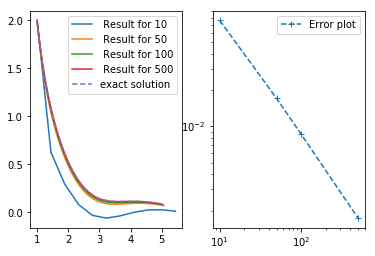

In [53]:
result = {}
fig, (ax1, ax2) = plt.subplots(1, 2)
for N in NR:
    result[N] = euler_timestep(f, a, b, α, N)
    y,t = result[N]
    # t is a list not an array
    #import pdb; pdb.set_trace()
    exact_II = [final_solu(w) for w in t]
    ax1.plot(t,y, label = f' Result for {N}')
ax1.plot(t, exact_II,'--', label = 'exact solution')
ax1.legend()

# abs(k-kk) for (k,kk) in zip(y, exact_II)

ax2.loglog(NR, [ abs(result[k][0][-1]-final_solu(5)) for k in NR],  '--+',  label = 'Error plot',)
ax2.legend()

## Assessments

In [54]:
assert len(euler_timestep.__doc__) >0

In [55]:
assert 'f:' in euler_timestep.__doc__

In [56]:

def data():
    f = lambda y, t: 1   
    a = 1
    b = 5
    α = 2
    y, t = euler_timestep(f, a, b, α, N)
    
    assert min(y) == 2
    assert max(y) == 6, f'max(y) == {max(y)} instead of 6'



In [57]:
data()

AssertionError: max(y) == 6.008016032064021 instead of 6